In [4]:
import numpy as np
import torch
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import  accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [5]:
db_gender_submission = pd.read_csv('gender_submission.csv')

db_test = pd.read_csv('test.csv')

db_train = pd.read_csv('train.csv')

db = db_train.loc[db_train['Survived'] == 1]
print(db.sort_values(by='Survived', ascending=False))

     PassengerId  Survived  Pclass  \
1              2         1       1   
573          574         1       3   
591          592         1       1   
587          588         1       1   
585          586         1       1   
..           ...       ...     ...   
306          307         1       1   
305          306         1       1   
303          304         1       2   
301          302         1       3   
889          890         1       1   

                                                  Name     Sex    Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00      1   
573                                  Kelly, Miss. Mary  female    NaN      0   
591    Stephenson, Mrs. Walter Bertram (Martha Eustis)  female  52.00      1   
587                   Frolicher-Stehli, Mr. Maxmillian    male  60.00      1   
585                                Taussig, Miss. Ruth  female  18.00      0   
..                                                 ...     ... 

In [22]:
db_train = pd.read_csv('train.csv')

In [11]:
db = db_train.loc[db_train['Survived'] ==1]
db_m = db.loc[db['Sex'] == 'male']
db_f = db.loc[db['Sex'] == 'female']
print(db_m)
print('-------------------------------------')
print(db_f)

     PassengerId  Survived  Pclass                             Name   Sex  \
17            18         1       2     Williams, Mr. Charles Eugene  male   
21            22         1       2            Beesley, Mr. Lawrence  male   
23            24         1       1     Sloper, Mr. William Thompson  male   
36            37         1       3                 Mamee, Mr. Hanna  male   
55            56         1       1                Woolner, Mr. Hugh  male   
..           ...       ...     ...                              ...   ...   
838          839         1       3                  Chip, Mr. Chang  male   
839          840         1       1             Marechal, Mr. Pierre  male   
857          858         1       1           Daly, Mr. Peter Denis   male   
869          870         1       3  Johnson, Master. Harold Theodor  male   
889          890         1       1            Behr, Mr. Karl Howell  male   

      Age  SibSp  Parch  Ticket     Fare Cabin Embarked  
17    NaN      0 

In [12]:
db_1 = db.loc[db['Pclass'] == 1]
db1 = db_train.loc[db_train['Pclass'] == 1]
db_2 = db.loc[db['Pclass'] == 2]
db2 = db_train.loc[db_train['Pclass'] == 2]
db_3 = db.loc[db['Pclass'] == 3]
db3 = db_train.loc[db_train['Pclass'] == 3]
db_4 = db.loc[db['Pclass'] == 4]
print(db1)
print('-------------------------')
print(db2)
print('-------------------------')
print(db3)
print('-------------------------')
print(db_4)
print('-------------------------')

     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
11            12         1       1   
23            24         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
23                        Sloper, Mr. William Thompson    male  28.0      0   
..                                                 ...     ...   ... 

In [13]:
mean_age = db['Age'].mean()
median_age = db['Age'].median()
print(mean_age)
print(median_age)
db_train['Age'].fillna(mean_age, inplace=True)
db['Age'].fillna(mean_age, inplace=True)
db_1 = db.loc[db['Age'] >=median_age]
db1 = db_train.loc[db_train['Age'] >= median_age]
db_2 = db.loc[db['Age'] <= median_age]
db2 = db_train.loc[db_train['Age'] <= median_age]

print(db1)
print('-------------------------')
print(db_1)
print('-------------------------')
print(db2)
print('-------------------------')
print(db_2)
print('-------------------------')


28.343689655172415
28.0
     PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
4              5         0       3   
5              6         0       3   
6              7         0       1   
..           ...       ...     ...   
881          882         0       3   
883          884         0       2   
885          886         0       3   
888          889         0       3   
890          891         0       3   

                                                  Name     Sex       Age  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00000   
4                             Allen, Mr. William Henry    male  35.00000   
5                                     Moran, Mr. James    male  28.34369   
6                              McCarthy, Mr. Timothy J    male  54.00000   
..                                                 ...     ... 

C:\Users\ismae\AppData\Local\Temp\ipykernel_7672\2029535404.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db['Age'].fillna(mean_age, inplace=True)


In [23]:
db_train.drop(columns = 'PassengerId',inplace=True)
db_train.drop(columns = 'Name',inplace=True)
db_train.drop(columns = 'Ticket',inplace=True)
db_train.drop(columns = 'Cabin',inplace=True)
db_train.drop(columns = 'Fare',inplace=True)
db_train.drop(columns = 'Embarked',inplace=True)



print(db_train)

     Survived  Pclass     Sex   Age  SibSp  Parch
0           0       3    male  22.0      1      0
1           1       1  female  38.0      1      0
2           1       3  female  26.0      0      0
3           1       1  female  35.0      1      0
4           0       3    male  35.0      0      0
..        ...     ...     ...   ...    ...    ...
886         0       2    male  27.0      0      0
887         1       1  female  19.0      0      0
888         0       3  female   NaN      1      2
889         1       1    male  26.0      0      0
890         0       3    male  32.0      0      0

[891 rows x 6 columns]


In [36]:
#db_train['Sex'] = db_train['Sex'].map({'male': 0, 'female': 1})
db_train['Sex'] = db_train['Sex'].map({0: 1, 1: 0})
print(db_train)

     Survived  Pclass  Sex        Age  SibSp  Parch  Family
0           0       3    0  22.000000      1      0       1
1           1       1    1  38.000000      1      0       1
2           1       3    1  26.000000      0      0       0
3           1       1    1  35.000000      1      0       1
4           0       3    0  35.000000      0      0       0
..        ...     ...  ...        ...    ...    ...     ...
886         0       2    0  27.000000      0      0       0
887         1       1    1  19.000000      0      0       0
888         0       3    1  29.699118      1      2       1
889         1       1    0  26.000000      0      0       0
890         0       3    0  32.000000      0      0       0

[891 rows x 7 columns]


In [25]:
db_train['Family'] = db_train.apply(lambda row: 1 if row['SibSp'] == 1 or row['Parch'] == 1 else 0, axis=1)
db_g_test['Family'] = db_g_test.apply(lambda row: 1 if row['SibSp'] == 1 or row['Parch'] == 1 else 0, axis=1)
print(db_train)
print(db_g_test)

     Survived  Pclass  Sex   Age  SibSp  Parch  Family
0           0       3    0  22.0      1      0       1
1           1       1    1  38.0      1      0       1
2           1       3    1  26.0      0      0       0
3           1       1    1  35.0      1      0       1
4           0       3    0  35.0      0      0       0
..        ...     ...  ...   ...    ...    ...     ...
886         0       2    0  27.0      0      0       0
887         1       1    1  19.0      0      0       0
888         0       3    1   NaN      1      2       1
889         1       1    0  26.0      0      0       0
890         0       3    0  32.0      0      0       0

[891 rows x 7 columns]
     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Family
0            892         0       3    0  34.5      0      0       0
1            893         1       3    1  47.0      1      0       1
2            894         0       2    0  62.0      0      0       0
3            895         0       3    0  27.

In [42]:
print(db_train)

     Survived  Pclass  Sex        Age  SibSp  Parch  Family
0           0       3    0  22.000000      1      0       1
1           1       1    1  38.000000      1      0       1
2           1       3    1  26.000000      0      0       0
3           1       1    1  35.000000      1      0       1
4           0       3    0  35.000000      0      0       0
..        ...     ...  ...        ...    ...    ...     ...
886         0       2    0  27.000000      0      0       0
887         1       1    1  19.000000      0      0       0
888         0       3    1  29.699118      1      2       1
889         1       1    0  26.000000      0      0       0
890         0       3    0  32.000000      0      0       0

[891 rows x 7 columns]


In [41]:
X_train = db_train.drop(columns=['Survived','SibSp','Parch'])
y_train = db_train['Survived']

X_test = db_g_test.drop(columns=['PassengerId','Survived','SibSp','Parch'])
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


accuracy = accuracy_score(db_g_test['Survived'], y_pred)
classification_report_result = classification_report(db_g_test['Survived'], y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report_result)


Accuracy: 0.9521531100478469
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       266
           1       0.93      0.94      0.93       152

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [43]:


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'] ,
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Bests Hyperparameters : ", best_params)

best_model = grid_search.best_estimator_
best_model.fit(X_train,y_train)
y_best_pred = model.predict(X_test)


accuracy = accuracy_score(db_g_test['Survived'], y_best_pred)
print(accuracy)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\s

Bests Hyperparameters :  {'C': 1, 'solver': 'liblinear'}
0.9521531100478469


C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\ismae\miniconda3\envs\py38\lib\site-packages\s

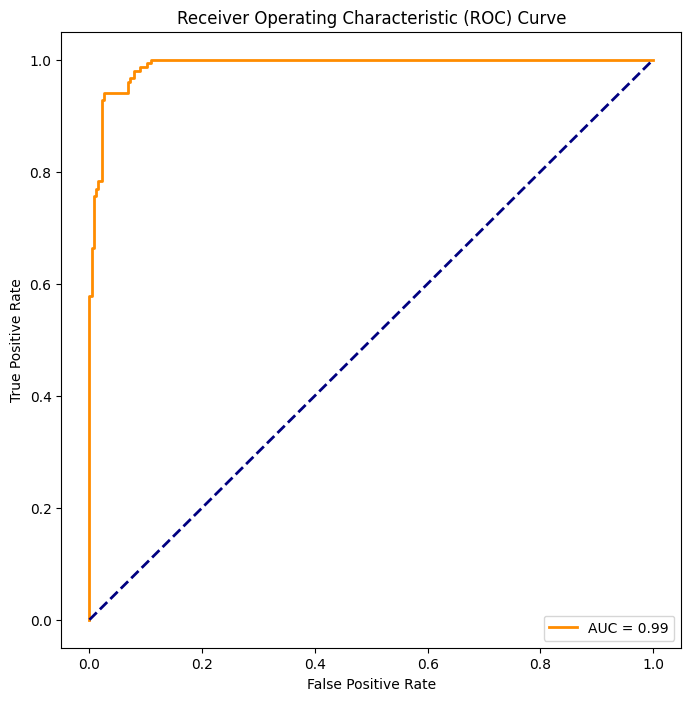

In [44]:
y_pred_proba = model.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(db_g_test['Survived'], y_pred_proba)


roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [29]:
print(db_train.isnull().sum())
m = db_train['Age'].mean()
db_train['Age'].fillna(m,inplace=True)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Family      0
dtype: int64


In [28]:
print(db_g_test)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Family
0            892         0       3    0  34.5      0      0       0
1            893         1       3    1  47.0      1      0       1
2            894         0       2    0  62.0      0      0       0
3            895         0       3    0  27.0      0      0       0
4            896         1       3    1  22.0      1      1       1
..           ...       ...     ...  ...   ...    ...    ...     ...
413         1305         0       3    0  27.0      0      0       0
414         1306         1       1    1  39.0      0      0       0
415         1307         0       3    0  38.5      0      0       0
416         1308         0       3    0  27.0      0      0       0
417         1309         0       3    0  27.0      1      1       1

[418 rows x 8 columns]


In [17]:
db_train['Age'].fillna(mean_age, inplace=True)
db_train['Age'].replace(median_age, mean_age, inplace=True)

In [15]:
print(db_g_test.isnull().sum())
m = db_g_test['Age'].mean()
db_g_test['Age'].fillna(m,inplace=True)

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
dtype: int64


In [12]:
db_g_test = pd.merge(db_gender_submission, db_test, on='PassengerId', how='outer')
print(db_g_test)


     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                                            ...     ...

In [14]:
median_value = db_g_test['Age'].median()
print(median_value)
db_g_test['Age'].fillna(median_value, inplace=True)

27.0


In [13]:
 db_g_test.drop(columns=['Embarked'],inplace=True)
 db_g_test.drop(columns=['Cabin'],inplace=True)
 db_g_test.drop(columns=['Name'],inplace=True)
 db_g_test.drop(columns=['Ticket'],inplace=True)
 db_g_test.drop(columns=['Fare'],inplace=True)

In [19]:
db_g_test['Sex'] = db_g_test['Sex'].map({'male': 0, 'female': 1})
print(db_g_test)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  Family
0            892         0       3    0  34.5      0      0       0
1            893         1       3    1  47.0      1      0       1
2            894         0       2    0  62.0      0      0       0
3            895         0       3    0  27.0      0      0       0
4            896         1       3    1  22.0      1      1       1
..           ...       ...     ...  ...   ...    ...    ...     ...
413         1305         0       3    0  27.0      0      0       0
414         1306         1       1    1  39.0      0      0       0
415         1307         0       3    0  38.5      0      0       0
416         1308         0       3    0  27.0      0      0       0
417         1309         0       3    0  27.0      1      1       1

[418 rows x 8 columns]


In [23]:
print(db_g_test)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch      Fare
0            892         0       3    0  34.5      0      0    7.8292
1            893         1       3    1  47.0      1      0    7.0000
2            894         0       2    0  62.0      0      0    9.6875
3            895         0       3    0  27.0      0      0    8.6625
4            896         1       3    1  22.0      1      1   12.2875
..           ...       ...     ...  ...   ...    ...    ...       ...
413         1305         0       3    0  27.0      0      0    8.0500
414         1306         1       1    1  39.0      0      0  108.9000
415         1307         0       3    0  38.5      0      0    7.2500
416         1308         0       3    0  27.0      0      0    8.0500
417         1309         0       3    0  27.0      1      1   22.3583

[418 rows x 8 columns]


In [24]:
print(db_g_test.drop(columns=['Survived']).isna().sum())
median_fare = db_g_test['Fare'].median()
print(median_fare)



PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64
14.4542


In [25]:
db_g_test['Fare'].fillna(median_fare, inplace=True)
print(db_g_test.drop(columns=['Survived']).isna().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


In [13]:

db_g_test.drop(columns = ['PassengerId'])




,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,34.5,0,0
1,1,3,1,47.0,1,0
2,0,2,0,62.0,0,0
3,0,3,0,27.0,0,0
4,1,3,1,22.0,1,1
...,...,...,...,...,...,...
413,0,3,0,27.0,0,0
414,1,1,1,39.0,0,0
415,0,3,0,38.5,0,0
416,0,3,0,27.0,0,0


In [27]:
db_train.drop(columns = ['Fare','Parch','SibSp','PassengerId'])


,Survived,Pclass,Sex,Age
0,0,3,0,22.00000
1,1,1,1,38.00000
2,1,3,1,26.00000
3,1,1,1,35.00000
4,0,3,0,35.00000
...,...,...,...,...
886,0,2,0,27.00000
887,1,1,1,19.00000
888,0,3,1,28.34369
889,1,1,0,26.00000


In [14]:
print(db_train)

     Survived  Pclass  Sex        Age  SibSp  Parch
0           0       3    0  22.000000      1      0
1           1       1    1  38.000000      1      0
2           1       3    1  26.000000      0      0
3           1       1    1  35.000000      1      0
4           0       3    0  35.000000      0      0
..        ...     ...  ...        ...    ...    ...
886         0       2    0  27.000000      0      0
887         1       1    1  19.000000      0      0
888         0       3    1  29.699118      1      2
889         1       1    0  26.000000      0      0
890         0       3    0  32.000000      0      0

[891 rows x 6 columns]


In [29]:
print(db_train)

     PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch     Fare
0              1         0       3    0  22.00000      1      0   7.2500
1              2         1       1    1  38.00000      1      0  71.2833
2              3         1       3    1  26.00000      0      0   7.9250
3              4         1       1    1  35.00000      1      0  53.1000
4              5         0       3    0  35.00000      0      0   8.0500
..           ...       ...     ...  ...       ...    ...    ...      ...
886          887         0       2    0  27.00000      0      0  13.0000
887          888         1       1    1  19.00000      0      0  30.0000
888          889         0       3    1  28.34369      1      2  23.4500
889          890         1       1    0  26.00000      0      0  30.0000
890          891         0       3    0  32.00000      0      0   7.7500

[891 rows x 8 columns]
